In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
cd '/content/drive/MyDrive/UdeA/Codes/ECOVAE/src/'

/content/drive/.shortcut-targets-by-id/1nEQLylZltxV_mjk-DfkfHKGVliIJ9s9l/UdeA/Codes/ECOVAE/src


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
path_file = '/content/drive/MyDrive/UdeA/Datasets/GrabacionesCamilo/G60A'

!python test.py   \
    --folder_path $path_file \
    --audio_len 60 \
    --lwin 12 \
    --ext 'WAV' \
    --n_fft 1024 \
    --checkpoints_path '/content/drive/MyDrive/UdeA/Codes/ECOVAE/checkpoints/3_699.pth' \
    --batch-size 1 \
    --num_hiddens 64 \
    --embedding_dim 128 \
    --num_embeddings 64 \
    --commitment_cost 0.25 \
    --decay 0.99 \
    --learning_rate 1e-3 \

files: 898 path: ['/content/drive/MyDrive/UdeA/Datasets/GrabacionesCamilo/G60A']
feat size1: torch.Size([1, 900])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
0 	 features: torch.Size([1, 900]) 	 name: ('/content/drive/MyDrive/UdeA/Datasets/GrabacionesCamilo/G60A/G60_20190603_111600.WAV',)
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
1 	 features: torch.Size([1, 900]) 	 name: ('/content/drive/MyDrive/UdeA/Datasets/GrabacionesCamilo/G60A/G60_20190603_113200.WAV',)
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513, 517])
tdata size:  torch.Size([1, 1, 513

In [ ]:
import torch
import torchaudio
from pathlib import Path
import torchaudio.transforms as T
from torch.utils.data import Dataset
import matplotlib.pyplot as plt


In [ ]:
path = '/content/drive/MyDrive/UdeA/Datasets/GrabacionesCamilo/G21A/G21A_20190520_190000.WAV'

x, sr = torchaudio.load(path)
resampling = 22050
xr = T.Resample(sr, resampling)(x)

num_channels, num_frames = xr.shape
time_axis = torch.arange(0, num_frames) / resampling

Sxx = T.Spectrogram(      
    n_fft=1024,
    win_length=None,
    hop_length=None,
    center=True,
    pad_mode="reflect", 
    power = None)(xr)

ISxx = T.InverseSpectrogram(
    n_fft=1024,
    win_length=None,
    hop_length=None,
    center=True,
    pad_mode="reflect")(Sxx)   
  

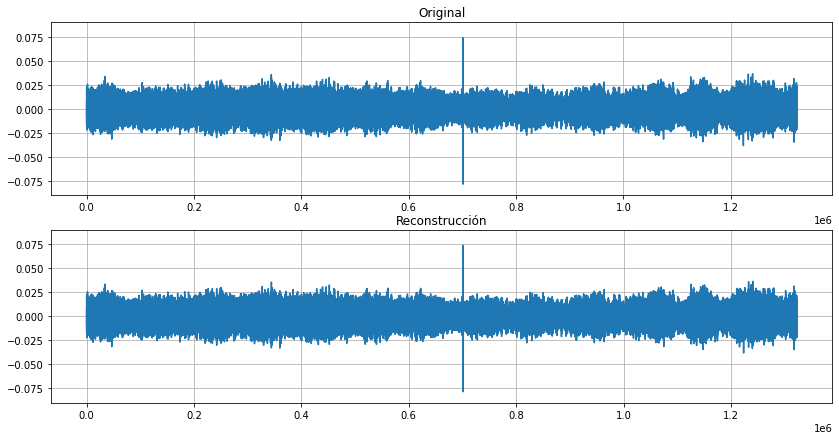

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1 , figsize=(14,7))
ax1.plot(xr.T)
ax1.grid()
ax1.set_title('Original')
ax1.set_ylim((-0.09,0.09))

ax2.plot(ISxx.T)
ax2.grid()
ax2.set_title('Reconstrucción')
ax2.set_ylim((-0.09,0.09))

plt.show()


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/UdeA/Codes/ECOVAE/src')


import torch
import argparse
from models import VQVAE
from utils import testModel, showgrid, inverse_data
from dataset import EcoData
from six.moves import xrange
from torch.utils.data import DataLoader
import torchaudio.transforms as T
import matplotlib.pyplot as plt



ImportError: ignored

In [ ]:
folder_path = ['/content/drive/MyDrive/Datasets/Grabaciones_Camilo_2/Sitio1/AudioMoth']

dataset = EcoData(folder_path)
data_files = DataLoader(dataset, batch_size=1, shuffle = False)
model = VQVAE(64, 64, 128, 0.25, 1e-3).to('cuda')
checkpoints = '/content/drive/MyDrive/UdeA/Codes/ECOVAE/checkpoints/3_699.pth'
file_checkpoint = torch.load(checkpoints)
model.load_state_dict(file_checkpoint['state_dict'])
model.eval()
iter_train = iter(data_files)






files: 1711 path: ['/content/drive/MyDrive/Datasets/Grabaciones_Camilo_2/Sitio1/AudioMoth']


In [ ]:
(data, _,_, file_) = next(iter_train)
data = data.permute(1,0,2,3)
data = data.to('cuda')

vq_loss, data_recon, perplexity = model(data)

data_recon = data_recon[:,0,:,:].cpu()

ISxx = T.InverseSpectrogram(
    n_fft=1024,
    win_length=None,
    hop_length=None,
    center=True,
    pad_mode="reflect")(data_recon.type(torch.complex64))

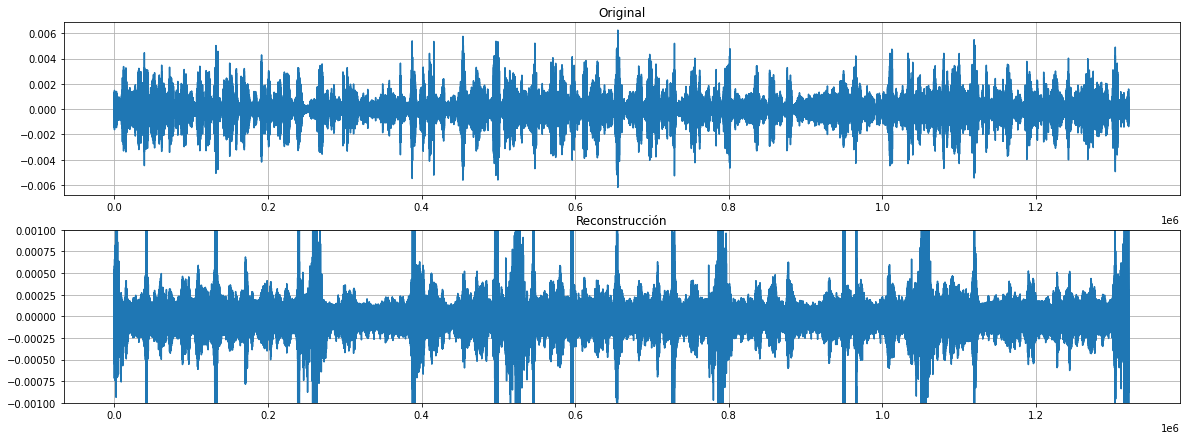

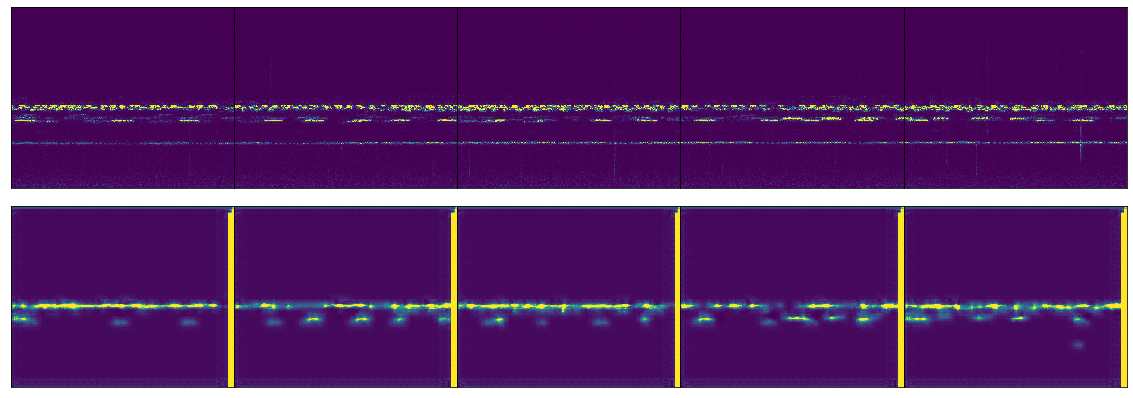

In [ ]:
raw_data = torch.squeeze(data.cpu())

raw   = inverse_data(raw_data,1024)
recon = inverse_data(data_recon,1024).detach().numpy()

fig, (ax1,ax2) = plt.subplots(2,1 , figsize=(20,7))
ax1.plot(raw)
ax1.grid()
ax1.set_title('Original')
#ax1.set_ylim((-0.025,0.025))

ax2.plot(recon)
ax2.grid()
ax2.set_title('Reconstrucción')
ax2.set_ylim((-0.001,0.001))

plt.show()

fig = showgrid(raw_data,data_recon )

In [ ]:
sum(b == a)

tensor(1320960)